In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath

def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95]):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8,8)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])

    ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.legend(prop={'size': 20},loc='best')

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])

    ax1.set_xlabel(label[0], fontsize=25)
    ax1.set_ylabel(label[1], fontsize=25)
    plt.savefig(pltname, bbox_inches = "tight")

In [84]:
gamma = 2.5
NW=7

hbar = 1.06e-34
q=1.6e-19
a=1e-9
qh=q/hbar

In [85]:
al= gamma*np.array([[0, 1, 0, 1],[1, 0, 1, 0],[ 0, 1, 0, 1], [0, 0, 1, 0]])
bL = gamma*np.array([[0,0,0,0],[1,0,0,0],[0,0,0,1],[0,0,0,0]])

print(al)
print(bW)
print(bL)

[[0.  2.5 0.  2.5]
 [2.5 0.  2.5 0. ]
 [0.  2.5 0.  2.5]
 [0.  0.  2.5 0. ]]
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [2.5 0.  0.  0. ]]
[[0.  0.  0.  0. ]
 [2.5 0.  0.  0. ]
 [0.  0.  0.  2.5]
 [0.  0.  0.  0. ]]


In [86]:
np.eye(NW)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot: >

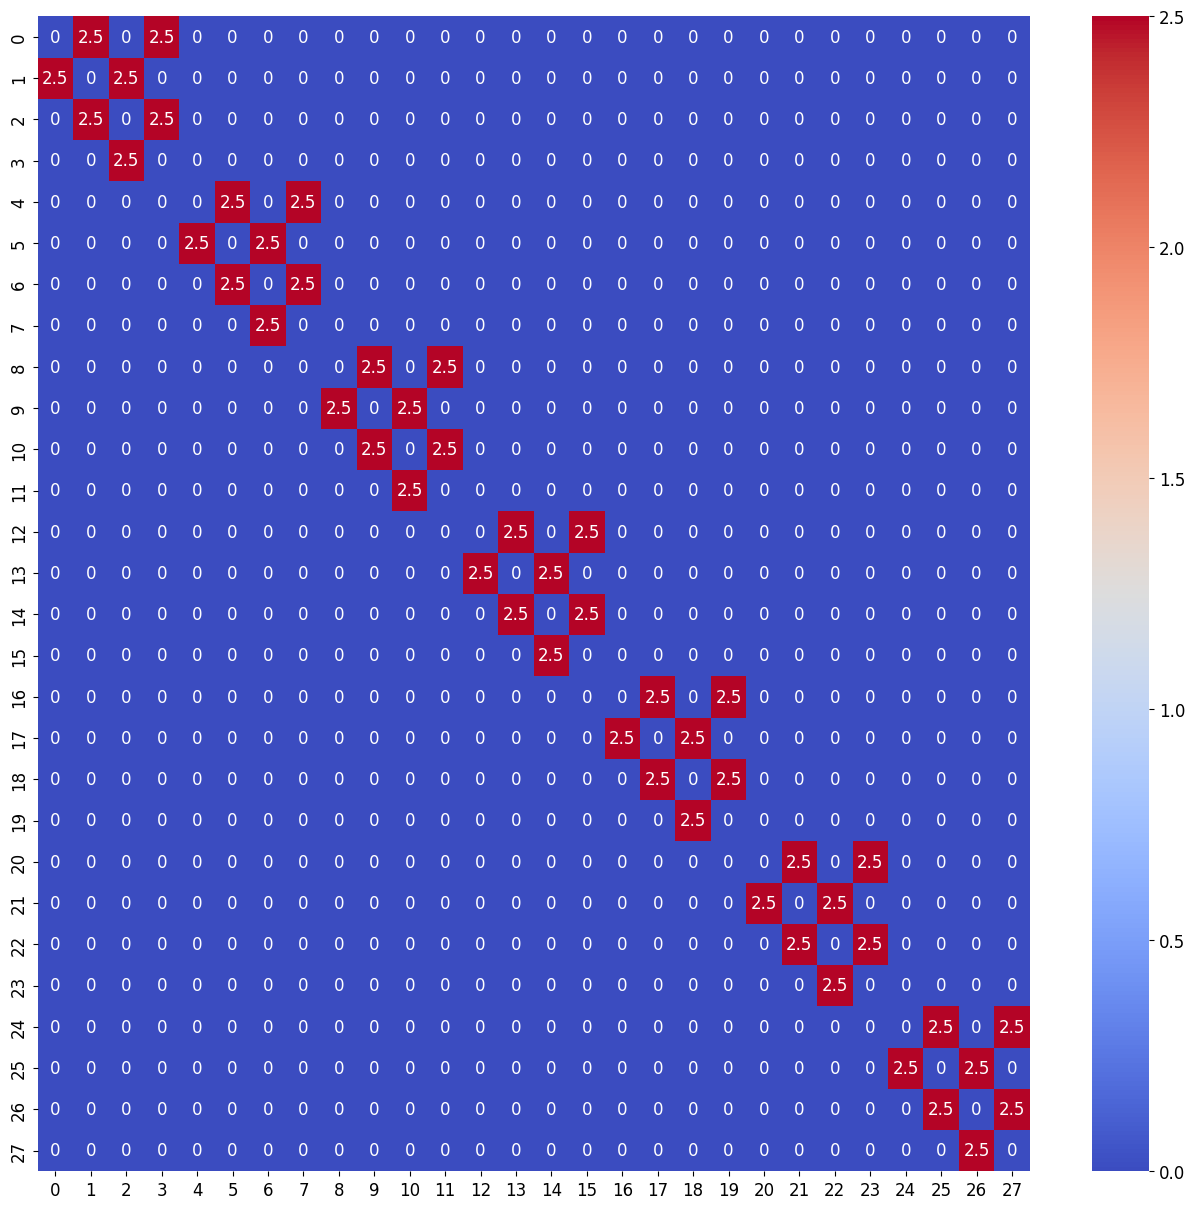

In [89]:
plt.figure(figsize = (16,15))

sns.heatmap(np.kron(np.eye(NW), al) ,cmap='coolwarm',annot=True)

In [62]:
np.ones(NW)

array([1.])

In [63]:
np.diag(np.ones((NW,NW)),1)

array([], dtype=float64)

In [64]:
np.kron(np.diag(np.ones(NW-1),1), bW)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [65]:
np.kron(np.diag(np.ones(NW-1),-1), bW.conj().T)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [66]:
np.ones(1)

array([1.])

In [67]:
np.kron(np.diag(np.ones(1),1-NW),bW)

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2.5, 0. , 0. , 0. ]])

<AxesSubplot: >

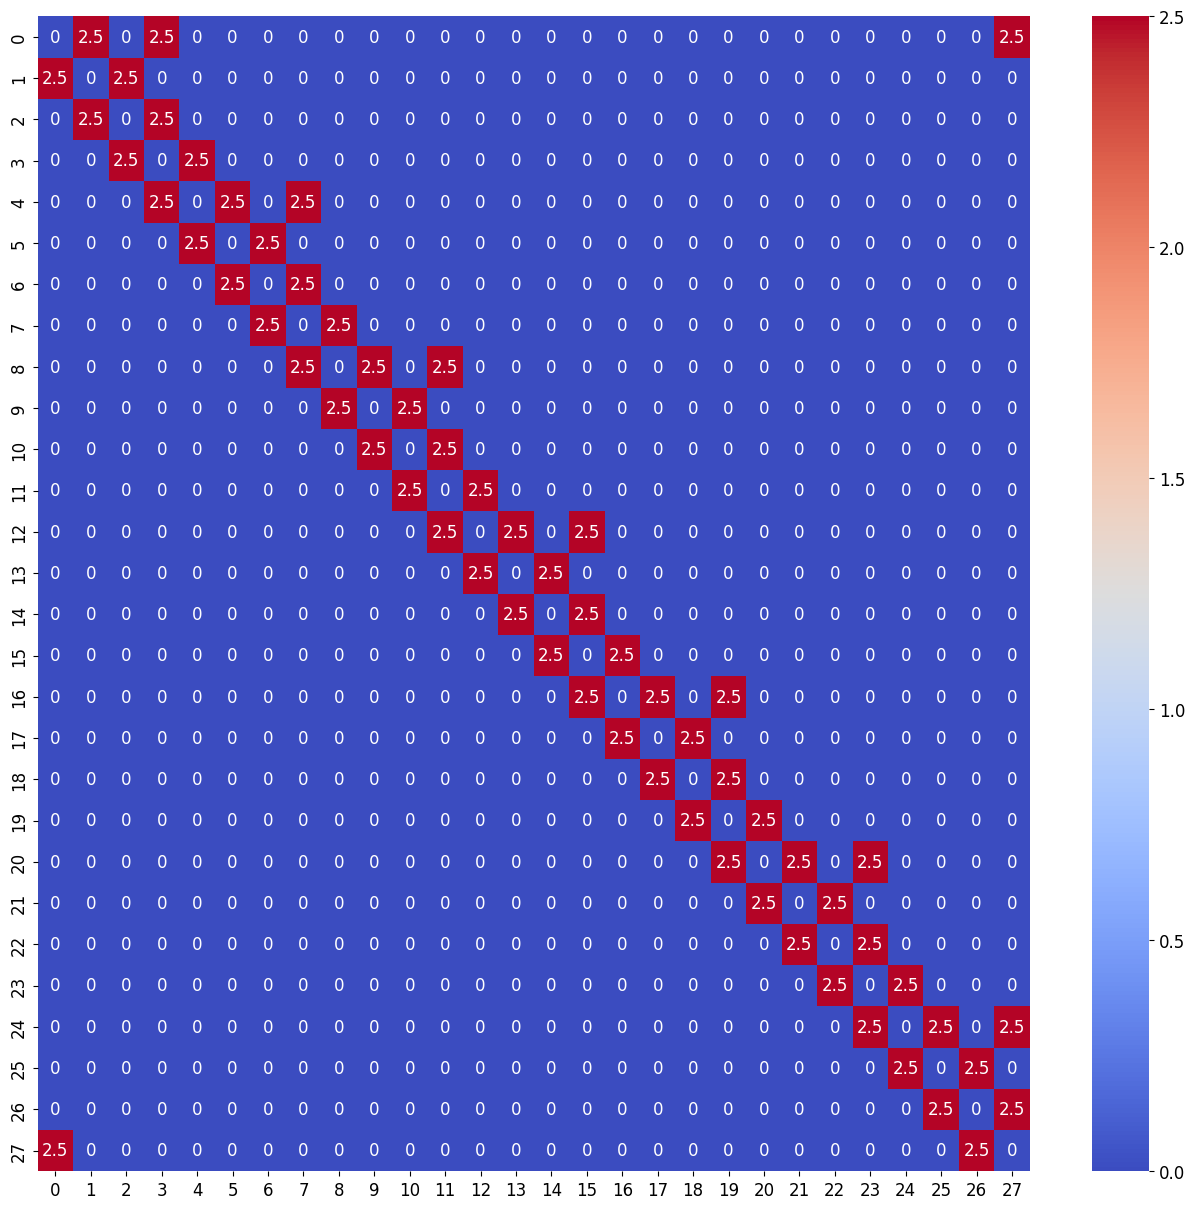

In [91]:
alpha = np.kron(np.eye(NW), al)+np.kron(np.diag(np.ones(NW-1),1), bW)+np.kron(np.diag(np.ones(NW-1),-1), bW.conj().T) + np.kron(np.diag(np.ones(1),1-NW),bW) + np.kron(np.diag(np.ones(1),NW-1),bW.conj().T)

plt.figure(figsize = (16,15)) 
sns.heatmap(alpha ,cmap='coolwarm',annot=True)


In [82]:
np.arange(1,NW+1,1)

array([1])

In [83]:
BB=0

beta = np.kron(np.diag(np.exp(1j*qh*BB*a*a*np.arange(1,NW+1,1))),bL)
print(beta)

[[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [2.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 2.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [ ]:
#np.kron(np.diag(np.ones(NL),1))